In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
wind = pd.read_csv('../1955-2014_wind.csv',header=None)

/usr/local/lib/python3.4/dist-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
wind.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,1955,2,1,1955-02-01,13:45:00,3,AR,5,1,...,0,0,0,0,0,77,0,0,0,NaN
1,2,1955,2,5,1955-02-05,08:00:00,3,LA,22,1,...,0,0,0,0,0,89,0,0,0,NaN
2,3,1955,2,11,1955-02-11,16:00:00,3,VA,51,1,...,0,0,0,0,0,175,0,0,0,NaN
3,4,1955,3,1,1955-03-01,02:00:00,3,KY,21,1,...,0,0,0,0,0,211,0,0,0,NaN
4,5,1955,3,1,1955-03-01,02:00:00,3,KY,21,2,...,0,0,0,0,0,185,0,0,0,NaN


We only care about some of the columns, so lets see what we want to keep

* year, month, day, date, time  [0-5]
* state 8
* speed knots 10
* injuries 11
* fatalities 12
* loss 13
* crop loss 14
* starting latitude, starting longitude, stop lat, stop long [15-18]
* length in miles 19
* width in yards 20
* magnitude type 28 (EG, MG, MS, ES) E = estimated M = measured G = gust S = sustained


In [4]:
wind = wind.drop([6,8,9,21,22,23,24,25,26,27], axis=1)
wind.head()
wind.rename(columns={0:'om',1:'yr',2:'mo',3:'dy',4:'date',5:'time',
                    7:'st',10:'mag', 11:'in',12:'fat',13:'loss',14:'closs',
                    15:'slat',16:'slong',17:'elat',18:'elong',19:'len',
                    20:'wid',28:'mt'},inplace=True)

In [5]:
w = wind[['st']]
#w.groupby(['st'])['st'].count()
wind.groupby(['yr','st']).head()



,om,yr,mo,dy,date,time,st,mag,in,fat,loss,closs,slat,slong,elat,elong,len,wid,mt
0,1,1955,2,1,1955-02-01,13:45:00,AR,0,0,0,0.0000,0.00000,34.7800,-90.7800,0.0000,0.0000,0,0,NaN
1,2,1955,2,5,1955-02-05,08:00:00,LA,0,0,0,0.0000,0.00000,29.9800,-90.2800,0.0000,0.0000,0,0,NaN
2,3,1955,2,11,1955-02-11,16:00:00,VA,0,0,0,0.0000,0.00000,36.5800,-77.1800,0.0000,0.0000,0,0,NaN
3,4,1955,3,1,1955-03-01,02:00:00,KY,0,0,0,0.0000,0.00000,38.2000,-85.1800,0.0000,0.0000,0,0,NaN
4,5,1955,3,1,1955-03-01,02:00:00,KY,0,0,0,0.0000,0.00000,38.3800,-85.4000,0.0000,0.0000,0,0,NaN
5,6,1955,3,1,1955-03-01,02:30:00,KY,0,0,0,0.0000,0.00000,37.2800,-84.9000,0.0000,0.0000,0,0,NaN
6,7,1955,3,1,1955-03-01,06:24:00,TN,75,0,0,0.0000,0.00000,35.7800,-84.0000,0.0000,0.0000,0,0,NaN
7,8,1955,3,1,1955-03-01,06:55:00,TN,0,0,0,0.0000,0.00000,35.7800,-84.0000,0.0000,0.0000,0,0,NaN
8,9,1955,3,3,1955-03-03,21:00:00,IN,0,0,0,0.0000,0.00000,41.0000,-85.1800,0.0000,0.0000,0,0,NaN
9,10,1955,3,5,1955-03-05,15:10:00,VA,0,0,0,0.0000,0.00000,36.8800,-79.2800,0.0000,0.0000,0,0,NaN


In [6]:
wind.shape

(363989, 19)

In [7]:
wind = wind[(wind.slat != 0.0) & (wind.slong != 0.0)]
w = wind[(wind.mag > 60) & (wind.yr > 2000)]
lat = w.slat.values
lon = w.slong.values
wind.shape

(363972, 19)

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

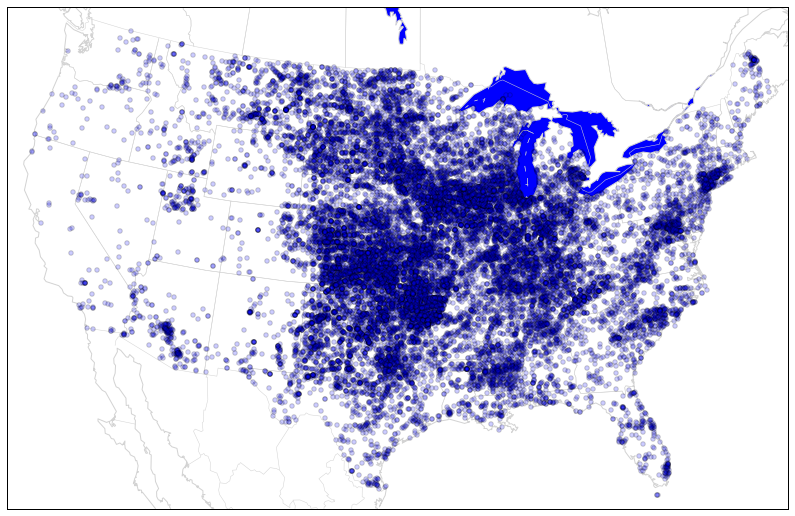

In [9]:
fig,ax = plt.subplots(figsize=(14,10))
m = Basemap(projection='lcc', resolution='l',
            llcrnrlon=-119, urcrnrlon=-64,
            llcrnrlat=22, urcrnrlat=49,
            lat_1=33, lat_2=45, lon_0=-95,
            area_thresh=10000)

m.fillcontinents(color='white',lake_color='blue')
m.drawstates(color='lightgray')
m.drawcoastlines(color='lightgray')
m.drawcountries(color='lightgray')

m.scatter(lon,lat, latlon=True, marker='o', alpha=0.2, zorder=2)

Now, this is a great example.  What can we conclude from this?
* The wind blows a lot less out west?
* 

(273, 5, [-179.14734, 17.884813, 0.0, 0.0], [179.77847, 71.35256064399981, 0.0, 0.0], <matplotlib.collections.LineCollection object at 0x7f2d33b65400>)
dict_keys(['RINGNUM', 'DIVISION', 'ST99_D00_I', 'LSAD_TRANS', 'STATE', 'AREA', 'PERIMETER', 'ST99_D00_', 'LSAD', 'REGION', 'NAME', 'SHAPENUM'])


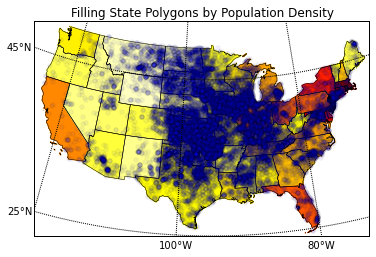

In [10]:
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
popdensity = {
'New Jersey':  438.00,
'Rhode Island':   387.35,
'Massachusetts':   312.68,
'Connecticut':	  271.40,
'Maryland':   209.23,
'New York':    155.18,
'Delaware':    154.87,
'Florida':     114.43,
'Ohio':	 107.05,
'Pennsylvania':	 105.80,
'Illinois':    86.27,
'California':  83.85,
'Hawaii':  72.83,
'Virginia':    69.03,
'Michigan':    67.55,
'Indiana':    65.46,
'North Carolina':  63.80,
'Georgia':     54.59,
'Tennessee':   53.29,
'New Hampshire':   53.20,
'South Carolina':  51.45,
'Louisiana':   39.61,
'Kentucky':   39.28,
'Wisconsin':  38.13,
'Washington':  34.20,
'Alabama':     33.84,
'Missouri':    31.36,
'Texas':   30.75,
'West Virginia':   29.00,
'Vermont':     25.41,
'Minnesota':  23.86,
'Mississippi':	 23.42,
'Iowa':	 20.22,
'Arkansas':    19.82,
'Oklahoma':    19.40,
'Arizona':     17.43,
'Colorado':    16.01,
'Maine':  15.95,
'Oregon':  13.76,
'Kansas':  12.69,
'Utah':	 10.50,
'Nebraska':    8.60,
'Nevada':  7.03,
'Idaho':   6.04,
'New Mexico':  5.79,
'South Dakota':	 3.84,
'North Dakota':	 3.59,
'Montana':     2.39,
'Wyoming':      1.96,
'Alaska':     0.42}
print(shp_info)
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 450 # set range.
print(m.states_info[0].keys())
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
# draw meridians and parallels.
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])
m.scatter(lon,lat, latlon=True, marker='o', alpha=0.05, zorder=2)
plt.title('Filling State Polygons by Population Density')
plt.show()

In [11]:
m.scatter?